# HCV Dataset

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,learning_curve,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,IsolationForest,RandomForestRegressor,AdaBoostClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,plot_confusion_matrix,precision_recall_fscore_support\
,mean_squared_error,matthews_corrcoef,roc_curve,balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor,KNeighborsClassifier
from sklearn.decomposition import PCA  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN

### Dataset Description 
<br>
<li>HCV is a dataset created to predict people infected by Hepatitis</li>
<li>Dataset consists of 14 Attributes and 615 instance</li> 
<li>The attributes represents Patient information and his/her medical results and Category column is a string value describes the medical condition of the   patient </li>
<li>The target attribute consists of 5 classes;'0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'</li> 

## Data Exploration

In [2]:
# Reading the dataset file
Dataset=pd.read_csv('hcvdat0.csv')
Dataset.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
# Removing Unnamed:0 , as it an unnecssary index column from the csvfile
Dataset.drop(['Unnamed: 0'], axis=1 ,inplace=True)

In [4]:
# Checking datatype of attributes
Dataset.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [5]:
Dataset.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [6]:
# Converting categorical to numerical 
label=LabelEncoder()
Dataset['Category']=label.fit_transform(Dataset['Category'])
Dataset['Sex']=label.fit_transform(Dataset['Sex'])
Dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [7]:
# Checking missing values 
Dataset.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
# a code to center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
}
</style>
""")

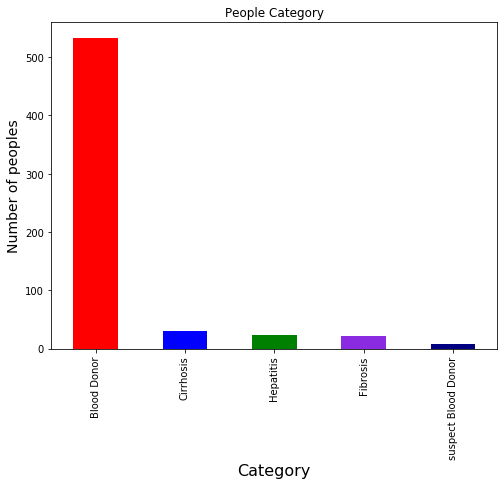

In [9]:
#checking the frequency of each class 
ax=Dataset['Category'].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(5),['Blood Donor','Cirrhosis','Hepatitis','Fibrosis','suspect Blood Donor'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

In [10]:
# Checking correlation of each attriubute
corr = Dataset.corr()
corr 

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.106341,0.060657,-0.288252,0.032323,0.106574,0.648341,0.473006,-0.329472,-0.308071,0.182040,0.471164,0.007230
Age,0.106341,1.000000,-0.024544,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
Sex,0.060657,-0.024544,1.000000,0.146140,-0.019825,0.161868,0.130891,0.111177,0.169111,-0.030208,0.159589,0.133276,0.051277
ALB,-0.288252,-0.197498,0.146140,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.032323,0.173340,-0.019825,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,0.106574,-0.006021,0.161868,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.648341,0.088666,0.130891,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.473006,0.032492,0.111177,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.329472,-0.075093,0.169111,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,-0.308071,0.125641,-0.030208,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071


In [11]:
# Viewing missing data from which class
Dataset.loc[Dataset['ALP'].isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,2,19,1,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,2,29,1,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
546,2,30,1,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
568,3,49,1,39.0,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
569,3,49,1,46.0,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
570,3,50,1,42.0,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
571,3,53,1,46.0,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
576,3,71,1,37.0,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
581,3,49,0,39.0,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0
582,3,51,0,37.0,NaN,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0


In [12]:
listOfAccs=[]
listOfAccs.append(['Accuracy','matthews_corrcoef','Precision','Recall','Fscore','Note'])
# Defining Function that shows the accuracies of models
def showAcc(model,x_train,x_test,y_train,y_test,y_pred,notes):
    global listOfAccs
    print("ACC of model: %.4f" %accuracy_score(y_pred,y_test))
    kfold = KFold(n_splits=5)
    accuracy_results = cross_val_score(model, x_train, y_train, cv=kfold)
    accuracyMessage = "KFold Acc : %.4f  " % ( accuracy_results.mean())
    print(accuracyMessage)
    print(f"Matthews_Corrcoef Accuracy {matthews_corrcoef(y_test, y_pred):.4f}")
    print(f"balanced_accuracy_score {balanced_accuracy_score(y_test,y_pred):0.4f}")
    m=precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f"Precision : {m[0]:.4f} Recall : {m[1]:.4f} Fscore : {m[2]:.4f}" )
    plot_confusion_matrix(model,x_test,y_test,cmap='Purples')
    plt.title('Confusion matrix of the model')
    plt.ylabel('Disease Category')
    plt.show()
    listOfAccs.append([accuracy_score(y_pred,y_test),matthews_corrcoef(y_test, y_pred) ,m[0],m[1],m[2],notes])

In [13]:
def modelBuilder(model,x,y,test_size=0.2,curve=False,tunning=False,hyper=None,roc=False,notes=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size,random_state=42)
    # Creating pipline to transform and build the model
    if tunning:
        pipe = Pipeline([('scaler', StandardScaler()), ('model', GridSearchCV(model,hyper,cv=3,n_jobs=-1) )])
    else:
        pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    # if i want to use search grid

    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    showAcc(pipe,x_train,x_test,y_train,y_test,y_pred,notes)
    if (curve==True):
        train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(pipe, x_train, y_train,cv=3,
                            scoring='accuracy',n_jobs=-1)
        fig=plt.figure()
        ax=fig.add_axes([0,0,1,1])
        ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
        ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
        ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
        ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
        ax.set_xlabel('Data Range')
        ax.set_ylabel('Accuracy')
        ax.set_title('Learning Curve')
        plt.show()
    return pipe

ACC of model: 0.8898
KFold Acc : 0.9427  
Matthews_Corrcoef Accuracy 0.5630
balanced_accuracy_score 0.5000
Precision : 0.6368 Recall : 0.5000 Fscore : 0.5436


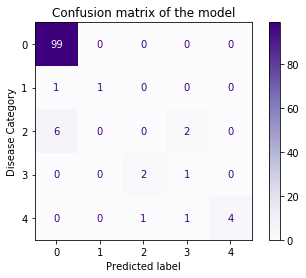

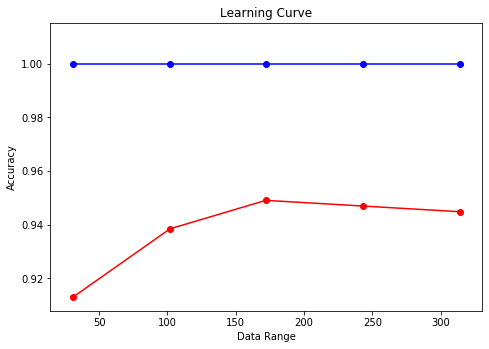

In [14]:
## Traning a model with the current data to check the initial accuarcy
DS=Dataset.copy()
DS=DS.dropna()
x_Dataset=DS.iloc[:,1:]
y_Dataset=DS.iloc[:,:1]
y_Dataset=y_Dataset.values.ravel()
RF=RandomForestClassifier(n_estimators=100,random_state=42)
FirstRF=modelBuilder(RF,x_Dataset,y_Dataset,curve=True,notes='First Model')

### First impression (Data problems)
**<li>As shown that the missing data are from minority classes, So we can't drop the rows
    ,And the correlation between missing features and Category is high , so the missing data can not be ignored</li>**
**<li>Data is not balanced , so it cause some problems such as over fitting and high accuracy because of the majority class</li>**
**<li>As mentioned , imbalanced data acc is misleading ,so Recall(true negative rate),precision and f1 will be more effective</li>**

## Solving Missing Data 
**Missing data will be predicted using Random forest regerssor**

In [15]:
fullData=Dataset.copy()
fullData.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [16]:
# First we have to drop all nans except ALP nan that we will train the model on 
# get all nans except ALP 
ALbNan=fullData[fullData['ALB'].isnull()]
AltNan=fullData[fullData['ALT'].isnull()]
CholNan=fullData[fullData['CHOL'].isnull()] 
ProtNan=fullData[fullData['PROT'].isnull()]
# Get the indices 
nanExceptAlp=pd.concat([ALbNan,AltNan,CholNan,ProtNan])
nanExceptAlp=nanExceptAlp.index
# Then drop them
fullData.drop(nanExceptAlp,inplace=True)
fullData.isnull().sum()

Category     0
Age          0
Sex          0
ALB          0
ALP         15
ALT          0
AST          0
BIL          0
CHE          0
CHOL         0
CREA         0
GGT          0
PROT         0
dtype: int64

In [17]:
## get the data that will be predicted
ALPNAN=fullData[fullData['ALP'].isnull()]
fullData=fullData.dropna()

In [18]:
# Then split data
x=fullData.drop(['ALP'],axis=1)
y=fullData['ALP'].values.ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=42)
x_train

,Category,Age,Sex,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
317,0,77,1,52.2,12.0,23.5,10.9,5.51,4.41,103.0,25.8,67.2
76,0,38,1,42.0,34.8,42.2,3.3,6.10,4.74,96.0,14.6,66.7
535,1,49,1,21.6,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
389,0,44,0,45.6,21.0,19.1,3.7,10.36,6.68,74.0,20.8,74.4
30,0,34,1,41.8,30.9,35.5,6.1,9.97,5.94,89.0,48.5,71.3
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,38,1,39.9,71.7,43.9,10.4,10.90,7.01,99.0,88.3,73.1
106,0,41,1,44.7,25.2,20.2,6.3,10.34,4.23,74.0,23.7,72.1
271,0,59,1,38.4,15.9,27.2,3.0,6.88,6.89,91.0,14.0,64.5
441,0,49,0,39.3,18.3,15.0,4.8,8.03,4.58,83.0,12.5,74.3


In [19]:
# Then building pipe line and perform fine tunning
pipeline=Pipeline([('scaler', StandardScaler()), ('model',  RandomForestRegressor(random_state = 42))])
hyperparameters = { 'model__n_estimators': [20, 30, 50,100],
                    'model__max_depth': [2, 5,10],
                    'model__min_samples_leaf': [2, 5,10]
                  }
Regerssor= GridSearchCV(pipeline, hyperparameters, cv = 3)
Regerssor.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [2, 5, 10],
                         'model__min_samples_leaf': [2, 5, 10],
                         'model__n_estimators': [20, 30, 50, 100]})

In [20]:
# Best parms of the regressos is 
Regerssor.best_params_

{'model__max_depth': 10,
 'model__min_samples_leaf': 5,
 'model__n_estimators': 50}

In [21]:
# RMSE 
y_pred=Regerssor.predict(x_test)
rmse=print(np.sqrt(mean_squared_error(y_pred, y_test)))

15.8574138160231


In [22]:
# Getting x of rows to predict ALP
missingALP=ALPNAN.drop(['ALP'],axis=1)
ALPResults=Regerssor.predict(missingALP)
ALPResults

array([40.24921055, 39.65474733, 40.46167174, 47.0106767 , 43.58017536,
       43.40207096, 55.64447649, 50.24697648, 43.86038309, 52.29001906,
       48.38405786, 52.24577516, 57.7748291 , 62.05195967, 48.53778834])

In [23]:
ALPNAN.loc[ALPNAN['ALP'].isnull(),['ALP']]=ALPResults
ALPNAN

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,2,19,1,41.0,40.249211,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,2,29,1,49.0,39.654747,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
546,2,30,1,45.0,40.461672,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
568,3,49,1,39.0,47.010677,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
569,3,49,1,46.0,43.580175,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
570,3,50,1,42.0,43.402071,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
571,3,53,1,46.0,55.644476,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
576,3,71,1,37.0,50.246976,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
581,3,49,0,39.0,43.860383,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0
582,3,51,0,37.0,52.290019,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0


In [24]:
# mereging rows with predicted ALp with data with no missing values
newDS=pd.concat([fullData,ALPNAN])
newDS

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,3,56,0,39.0,48.384058,42.0,34.0,10.0,7.75,5.00,80.0,84.0,78.0
585,4,38,1,44.0,52.245775,94.0,60.0,12.0,4.37,3.20,61.0,99.0,77.0
592,4,47,1,42.0,57.774829,159.0,102.0,11.0,6.29,5.50,58.0,201.0,79.0
613,4,46,0,33.0,62.051960,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


ACC of model: 0.9008
KFold Acc : 0.9338  
Matthews_Corrcoef Accuracy 0.6119
balanced_accuracy_score 0.5417
Precision : 0.7920 Recall : 0.5417 Fscore : 0.6088


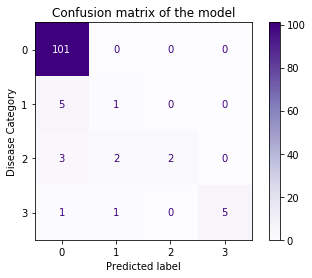

In [25]:
# Building the same model to check the difference 
x_Dataset=newDS.iloc[:,1:]
y_Dataset=newDS.iloc[:,:1]
y_Dataset=y_Dataset.values.ravel()
RF=RandomForestClassifier(n_estimators=100,random_state=42)
RF_after_missing=modelBuilder(RF,x_Dataset,y_Dataset,notes=('Predicted Missing Data'))

### Imputation Results
**After handling the missing data , it is noted that the accuracy is increased , although kfold acc is slightly reduced , but the acc of imbalanced data is appearing the increasing of precision,recall and F1, so handling data is very effective solution , and it will help in oversampling techniques**

## Outliers Detection

In [26]:
## First performing outliers detection using Isolation Forest
x_Dataset=newDS.iloc[:,1:]
y_Dataset=newDS.iloc[:,:1]
#Define the outlier
outlierDetector =  IsolationForest(n_estimators=100,random_state = 42)
result=outlierDetector.fit_predict(x_Dataset)

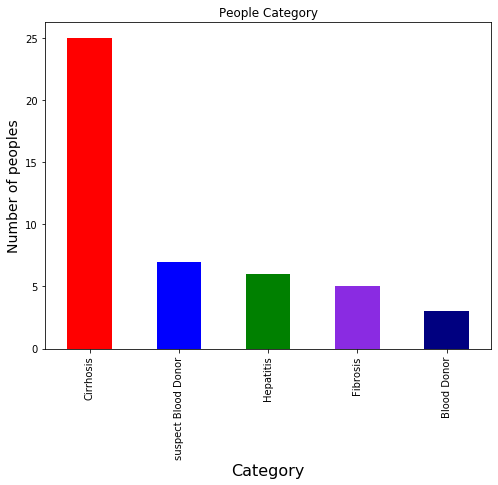

In [27]:
#Showing the most detected outliers from which class
classes_Of_Outliers=newDS[result==-1]
ax=classes_Of_Outliers['Category'].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(5),['Cirrhosis','suspect Blood Donor','Hepatitis','Fibrosis','Blood Donor'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

**It is noted, that most outliers Isolation Forest are from infeceted people , and we cannot remove them , as some classes will disappeared from dataset , so we have to try another outlier detector**

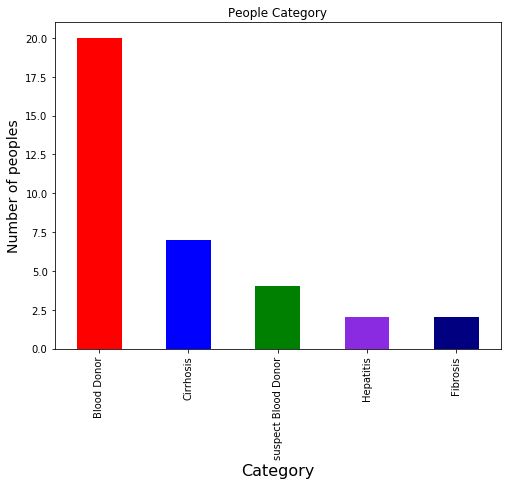

In [28]:
# Using LocalOutlier Factor
outlierDetector2 = LocalOutlierFactor(n_neighbors=2)
result=outlierDetector2.fit_predict(x_Dataset)
classes_Of_Outliers=newDS[result==-1]
ax=classes_Of_Outliers['Category'].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(5),['Blood Donor','Cirrhosis','suspect Blood Donor','Hepatitis','Fibrosis'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

**Outlier detector detected many outliers at majority class , so it will better to delete outliers from majority class**

In [29]:
## removing outliers from majoirty class
outliers=newDS[result==-1]
outlierIndex=outliers[outliers.Category==0].index
newDS.drop(outlierIndex,axis=0,inplace=True)

ACC of model: 0.9402
KFold Acc : 0.9187  
Matthews_Corrcoef Accuracy 0.7652
balanced_accuracy_score 0.6500
Precision : 0.8571 Recall : 0.6500 Fscore : 0.7284


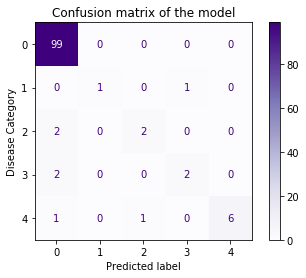

In [30]:
# see the influence of outlier removal
x_Dataset=newDS.iloc[:,1:]
y_Dataset=newDS.iloc[:,:1]
y_Dataset=y_Dataset.values.ravel()
RF=RandomForestClassifier(n_estimators=100,random_state=42)
RF_after_outliers=modelBuilder(RF,x_Dataset,y_Dataset,notes='After removing outliers')

**After Removing outliers of majority class the accuracy of classification is increased , and it cloud classify the minority classes better**

## Ensembles Model
### Since one of bagging models is used (Random forest), it is time to try an boosting Ensemble Model
#### <ol> 1.AdaBoost</ol>
#### <ol>2.Voting Classifiers</ol>

###  AdaBoost

ACC of model: 0.8974
KFold Acc : 0.8973  
Matthews_Corrcoef Accuracy 0.5737
balanced_accuracy_score 0.4000
Precision : 0.4135 Recall : 0.4000 Fscore : 0.3962


C:\Users\Mostafa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


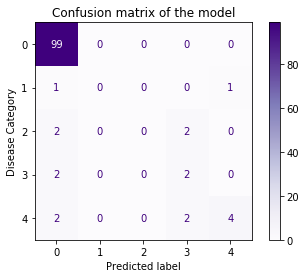

In [31]:
# First traning adaboost
# The appearing warning , as class 2 produce 0 true classifiers
model = AdaBoostClassifier(random_state=42)
hyper = {'n_estimators':[50,100,200],'learning_rate':[.001,0.01,.1]}
adaBoost=modelBuilder(model,x_Dataset,y_Dataset,tunning=True,hyper=hyper,notes='AdaBoost')

**Adaboost generates bad results,it is concluded weak learners of decision tress**

### Voting Classifiers

ACC of model: 0.9487
KFold Acc : 0.9272  
Matthews_Corrcoef Accuracy 0.8020
balanced_accuracy_score 0.6750
Precision : 0.8422 Recall : 0.6750 Fscore : 0.7327


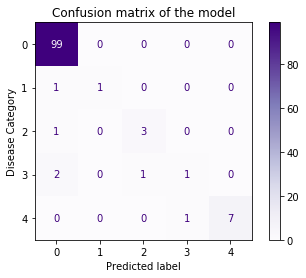

In [32]:
# Then voting classifiers Using Logistic , Naive Baies and Support Vector Machine 
estimator1= LogisticRegression(random_state=42)
estimator2 = SVC(random_state=42)
estimator3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
hyper = {'SVM__kernel':['rbf','linear','poly']}
Voting_Classifier=modelBuilder(model,x_Dataset,y_Dataset,tunning=True,hyper=hyper,notes='Voting Classifiers')

**Voting outperforms random forest results,these two classifiers produce the best accuracy**

### SVM
**After building bagging and boosting classifiers, an individual classifier will the chance**

ACC of model: 0.9231
KFold Acc : 0.9272  
Matthews_Corrcoef Accuracy 0.6948
balanced_accuracy_score 0.5750
Precision : 0.7704 Recall : 0.5750 Fscore : 0.6378


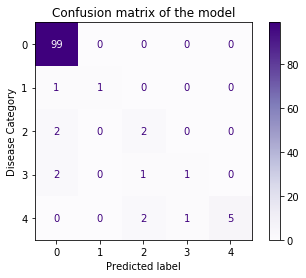

In [33]:
# SVM will be trained trying to solve overfitting prolbem
model= SVC()
hyper = {'kernel':['rbf','linear','poly'],'C': [0.1,1, 10, 100]}
SVM=modelBuilder(model,x_Dataset,y_Dataset,tunning=True,hyper=hyper,notes='SVM')

**Finally after building all these models, the best models are random forest and voting classifiers**

## Results
### Best model

ACC of model: 0.9487


C:\Users\Mostafa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


KFold Acc : 0.9272  
Matthews_Corrcoef Accuracy 0.8020
balanced_accuracy_score 0.6750
Precision : 0.8422 Recall : 0.6750 Fscore : 0.7327


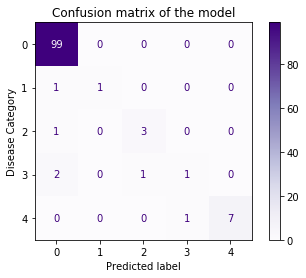

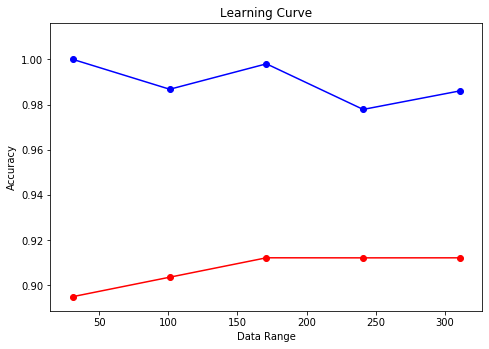

In [34]:
## warning it will took long time ,so paramestrs will saved 
## Voting Classifiers with funning turnning
estimator1= LogisticRegression(random_state=42)
estimator2 = SVC(random_state=42)
estimator3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
hyper = {'lr__penalty' : ['l2', 'none'],
         'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag,' 'saga'],
         'lr__C' : [0.1,1,2,10],
         'SVM__kernel':['rbf','linear','poly'],
         'SVM__C':[0.1,1,2,10],
         'SVM__gamma': [1,0.1,0.01,0.001],
          }
Best=Voting_Classifier=modelBuilder(model,x_Dataset,y_Dataset,tunning=True,hyper=hyper,curve=True)

In [35]:
params=Best['model'].best_params_

## Basis And Variance

**Despite the imbalanced data and low number of instances in some classes, but the classifier can classify more than 50% of the minority classes, but the classifier is still overfitting because of the number of instances in majority class is greater than all other classes, so the voting classifier is model with high variance and low basis**

C:\Users\Mostafa\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Mostafa\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


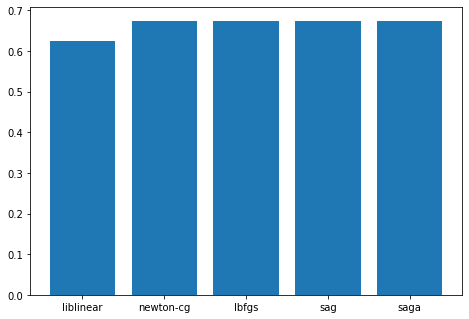

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_Dataset, y_Dataset, test_size=0.2,random_state=42)
## And variance is the difference between some model predicitions to one model
scores=[]
solvers=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
for x in solvers:
    # Tranining model
    estimator1= LogisticRegression(solver=x,random_state=42)
    estimator2 = SVC(random_state=42)
    estimator3 = GaussianNB()
    model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
    # Creating pipline to transform and build the model
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(balanced_accuracy_score(y_test,y_pred))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(solvers,scores)
plt.show()

**So by changing different solvers, the balanced accuracy is almost the same, so based on that the basis is low because model overfitting**

## Over-Sampling

### Over-sampling technique

In [37]:
#Copying the dfata
OverDS=newDS.copy()
# see the influence of outlier removal
x_Dataset=newDS.iloc[:,1:]
y_Dataset=newDS.iloc[:,:1]
y_Dataset=y_Dataset.values.ravel()

In [38]:
#Number of classes befor oversampling
OverDS['Category'].value_counts()

0    506
4     28
2     23
3     20
1      7
Name: Category, dtype: int64

In [39]:
overSampler = RandomOverSampler(random_state=42)
overX1,overY1=overSampler.fit_sample(x_Dataset, y_Dataset)

In [40]:
pd.DataFrame(overY1,columns=['Category'])['Category'].value_counts()

3    506
1    506
4    506
2    506
0    506
Name: Category, dtype: int64

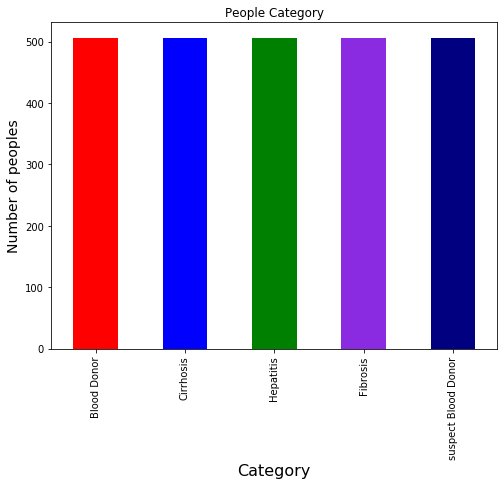

In [41]:
# First over sampling to make all classes equal
# As observed after undersampling , the two classes are balanced 
ax=pd.DataFrame(overY1,columns=['Category'])['Category'].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(5),['Blood Donor','Cirrhosis','Hepatitis','Fibrosis','suspect Blood Donor'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

ACC of model: 0.9071
KFold Acc : 0.8814  
Matthews_Corrcoef Accuracy 0.8846
balanced_accuracy_score 0.9071
Precision : 0.9105 Recall : 0.9071 Fscore : 0.9073


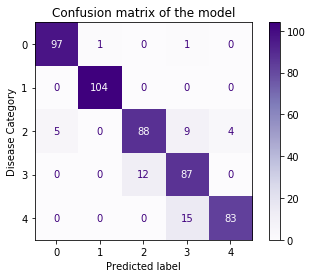

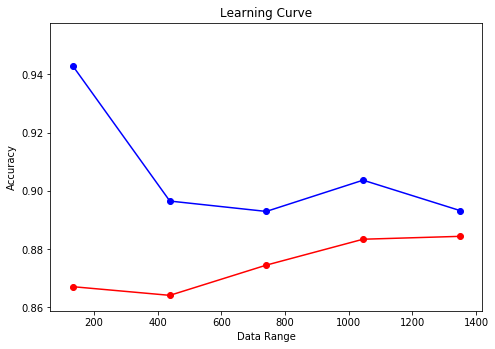

In [42]:
# Then building the model
estimator1= LogisticRegression(random_state=42,C=1,penalty='l2',solver='newton-cg')
estimator2 = SVC(random_state=42,C=10,gamma=1,kernel='linear')
estimator3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
Best=Voting_Classifier=modelBuilder(model,overX1,overY1,curve=True,notes='Full_OverSampling')

**As shown oversampling is very effective , as we can see the over all accuracy is decreased , but recall and other measures for imbalanced data is decreased , overfitting and most problems now are solved, but it will be better to oversampling by different ratios based on each category weight**

#### Ratios

In [43]:
overSampler = RandomOverSampler(random_state=42,sampling_strategy={0:506,1:300,2:280,3:250,4:150})
overX1,overY1=overSampler.fit_sample(x_Dataset, y_Dataset)

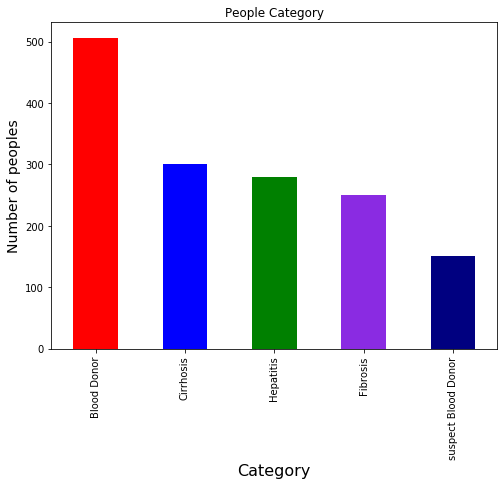

In [44]:
ax=pd.DataFrame(overY1,columns=['Category'])['Category'].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(5),['Blood Donor','Cirrhosis','Hepatitis','Fibrosis','suspect Blood Donor'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

ACC of model: 0.9262
KFold Acc : 0.9133  
Matthews_Corrcoef Accuracy 0.9043
balanced_accuracy_score 0.9119
Precision : 0.9164 Recall : 0.9119 Fscore : 0.9138


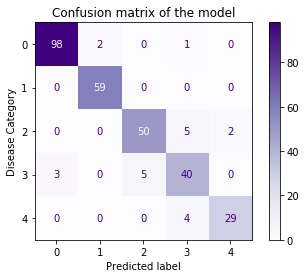

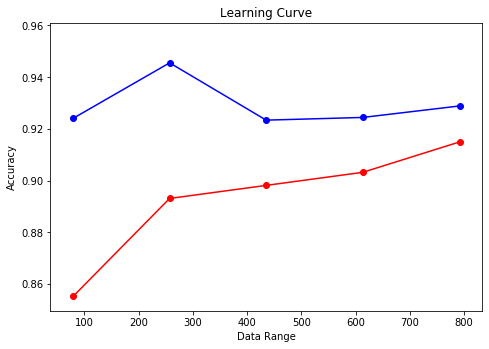

In [45]:
# Then building the model
estimator1= LogisticRegression(random_state=42,C=1,penalty='l2',solver='newton-cg')
estimator2 = SVC(random_state=42,C=10,gamma=1,kernel='linear')
estimator3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
Best=Voting_Classifier=modelBuilder(model,overX1,overY1,curve=True,notes='Ratio_OverSampling')

**OverSampling by ratios based on number of real data is more effective as accuracy is increased**

### Technique 2 (SMOTE)

In [46]:
#Copying the dfata
OverDS=newDS.copy()
# see the influence of outlier removal
x_Dataset=newDS.iloc[:,1:]
y_Dataset=newDS.iloc[:,:1]
y_Dataset=y_Dataset.values.ravel()

In [47]:
#Number of classes befor oversampling
OverDS['Category'].value_counts()

0    506
4     28
2     23
3     20
1      7
Name: Category, dtype: int64

In [48]:
# Defining oversample trainer
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_sample(x_Dataset, y_Dataset)

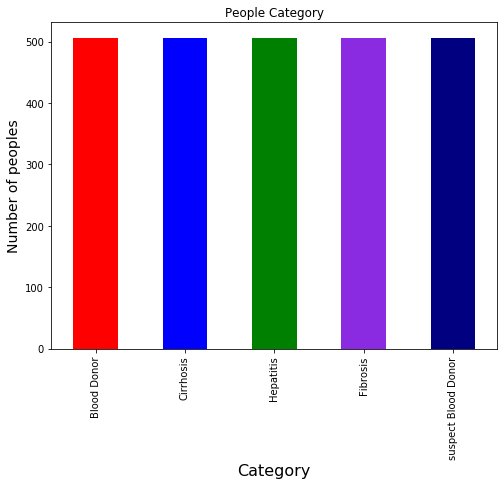

In [49]:
# First over sampling to make all classes equal
# As observed after undersampling , the two classes are balanced 
ax=pd.DataFrame(overY,columns=['Category'])['Category'].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(5),['Blood Donor','Cirrhosis','Hepatitis','Fibrosis','suspect Blood Donor'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

ACC of model: 0.9427
KFold Acc : 0.9471  
Matthews_Corrcoef Accuracy 0.9286
balanced_accuracy_score 0.9429
Precision : 0.9438 Recall : 0.9429 Fscore : 0.9429


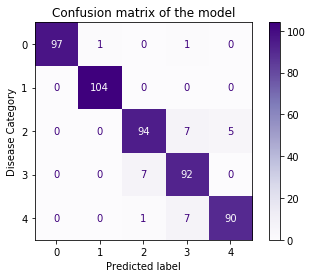

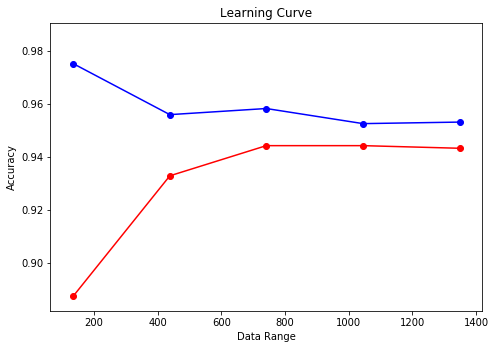

In [50]:
# Then buliding the best model with best params
estimator1= LogisticRegression(random_state=42,C=1,penalty='l2',solver='newton-cg')
estimator2 = SVC(random_state=42,C=10,gamma=1,kernel='linear')
estimator3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
Best=Voting_Classifier=modelBuilder(model,overX,overY,curve=True,notes='Full_Smote-Sampling')

### Over-sampling by smoth is very effective , as we can see the over all accuracy is increased , overfitting and most problems now are solved, but it will be better to oversampling by different ratios based on each category weight 

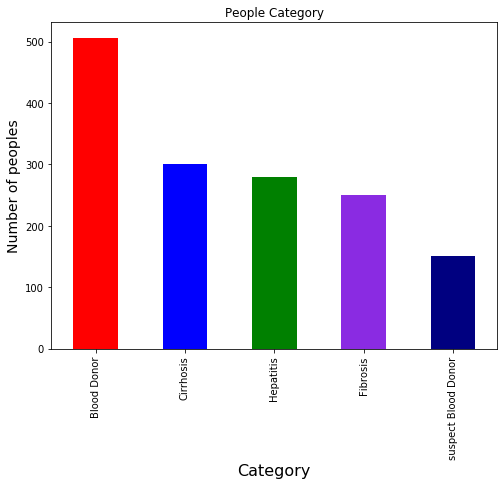

In [51]:
# Over sampling by weighted ratios
oversample = SMOTE(random_state=42,sampling_strategy={0:506,1:300,2:280,3:250,4:150})
overX,overY=oversample.fit_sample(x_Dataset, y_Dataset)
# As observed after undersampling , the two classes are balanced 
ax=pd.DataFrame(overY,columns=['Category'])['Category'].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(5),['Blood Donor','Cirrhosis','Hepatitis','Fibrosis','suspect Blood Donor'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

ACC of model: 0.9497
KFold Acc : 0.9461  
Matthews_Corrcoef Accuracy 0.9348
balanced_accuracy_score 0.9369
Precision : 0.9443 Recall : 0.9369 Fscore : 0.9401


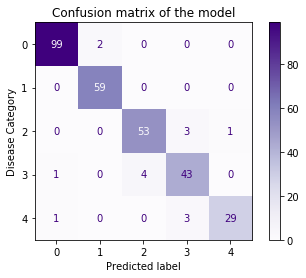

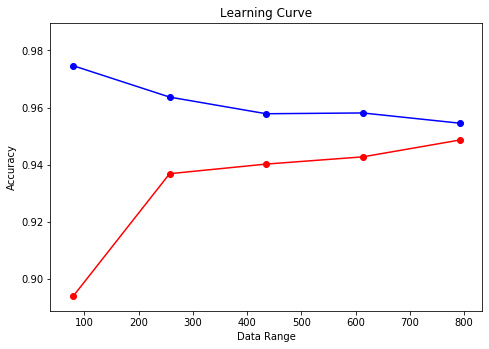

In [52]:
# Then building the model
estimator1= LogisticRegression(random_state=42,C=1,penalty='l2',solver='newton-cg')
estimator2 = SVC(random_state=42,C=10,gamma=1,kernel='linear')
estimator3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
Best=Voting_Classifier=modelBuilder(model,overX,overY,curve=True,notes='Ratio_Smote-Sampling')

#### After oversampling by weighted ratios , the accuracy is slightly increased because the dummy data is reduced , so the reached the best accuracy. Since the roc_curve needs probabilities of classification that is not provided from voting, and the dataset is multi class classification , so roc_curve will require different classifier and calculate roc curve for each class

## Technique 3 (ADASYN)

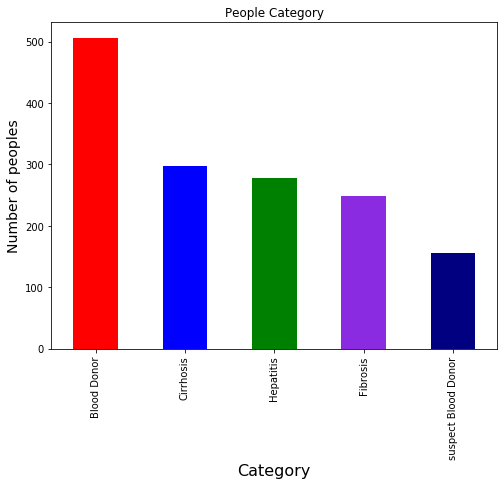

In [53]:
# Over sampling by ADASYN
oversample = ADASYN(random_state=42,sampling_strategy={0:506,1:300,2:280,3:250,4:150})
overX3,overY3=oversample.fit_sample(x_Dataset, y_Dataset)
# As observed after undersampling , the two classes are balanced 
ax=pd.DataFrame(overY3,columns=['Category'])['Category'].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(5),['Blood Donor','Cirrhosis','Hepatitis','Fibrosis','suspect Blood Donor'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

ACC of model: 0.9530
KFold Acc : 0.9327  
Matthews_Corrcoef Accuracy 0.9398
balanced_accuracy_score 0.9472
Precision : 0.9499 Recall : 0.9472 Fscore : 0.9469


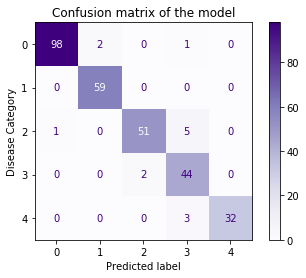

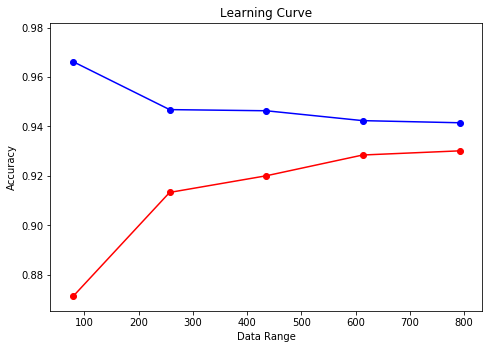

In [54]:
# Then building the model
estimator1= LogisticRegression(random_state=42,C=1,penalty='l2',solver='newton-cg')
estimator2 = SVC(random_state=42,C=10,gamma=1,kernel='linear')
estimator3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
Best=Voting_Classifier=modelBuilder(model,overX3,overY3,curve=True,notes='Ratio_Adasyn-Sampling')


### Result
**Three different techniques were used to oversample (RandomOversampler-Smote-Adasyn).
Results shows that oversampling by different weights based on number of each class will provide better results
Adasyn outperforms Smote and oversampling 
Oversampling reduced the overfitting of the model**

## Building the best model Piple-Line
#### Trying PCA

ACC of model: 0.9295
KFold Acc : 0.9141  
Matthews_Corrcoef Accuracy 0.9106
balanced_accuracy_score 0.9250
Precision : 0.9257 Recall : 0.9250 Fscore : 0.9217


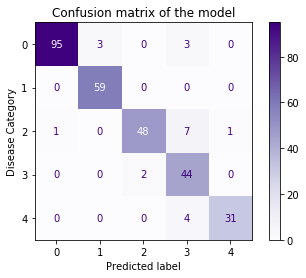

In [55]:
x_train, x_test, y_train, y_test = train_test_split(overX3,overY3,test_size=0.2,random_state=42)
# Creating pipline to transform and build the model
#Model
estimator1= LogisticRegression(random_state=42,C=1,penalty='l2',solver='newton-cg')
estimator2 = SVC(random_state=42,C=10,gamma=1,kernel='linear')
estimator3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
#Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('PCA',PCA(n_components=0.95)) ,('model', model)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
showAcc(pipe,x_train,x_test,y_train,y_test,y_pred,notes='With Pca')


In [56]:
pipe['PCA'].n_components_

10

#### PCA reduced the number of features to 10 features instead of 12 and reduces accuracy by 3-4% , so it will better not to use it

## Final Model

ACC of model: 0.9530
KFold Acc : 0.9327  
Matthews_Corrcoef Accuracy 0.9398
balanced_accuracy_score 0.9472
Precision : 0.9499 Recall : 0.9472 Fscore : 0.9469


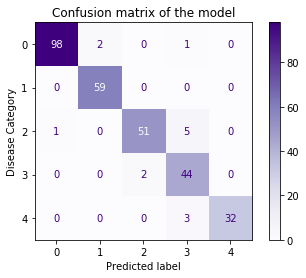

In [57]:
x_train, x_test, y_train, y_test = train_test_split(overX3,overY3,test_size=0.2,random_state=42)
# Creating pipline to transform and build the model
#Model
estimator1= LogisticRegression(random_state=42,C=1,penalty='l2',solver='newton-cg')
estimator2 = SVC(random_state=42,C=10,gamma=1,kernel='linear')
estimator3 = GaussianNB()
model = VotingClassifier(estimators=[('lr', estimator1), ('SVM', estimator2), ('Naive', estimator3)],voting='hard')
#Pipeline
pipe = Pipeline([('scaler', StandardScaler()),('model', model)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
showAcc(pipe,x_train,x_test,y_train,y_test,y_pred,notes=None)

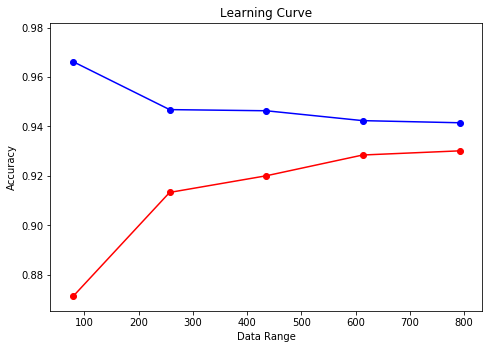

In [58]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(pipe, x_train, y_train,cv=3,
                            scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

**After solving most of problems such as removing outliers ,predicting missing values and oversampling, The model produced the best performance by ACC 95.3% and Recall 94.72**

In [59]:
Total_models=pd.DataFrame(listOfAccs,columns=listOfAccs[0])

In [60]:
Total_models.drop([0,7,14],inplace=True)
Total_models

,Accuracy,matthews_corrcoef,Precision,Recall,Fscore,Note
1,0.889831,0.563031,0.636792,0.5,0.543647,First Model
2,0.900826,0.611888,0.792045,0.541667,0.608781,Predicted Missing Data
3,0.940171,0.765182,0.857051,0.65,0.728407,After removing outliers
4,0.897436,0.573729,0.413459,0.4,0.396248,AdaBoost
5,0.948718,0.801974,0.842233,0.675,0.732706,Voting Classifiers
6,0.923077,0.694785,0.770385,0.575,0.637809,SVM
8,0.907115,0.884605,0.910453,0.907143,0.90734,Full_OverSampling
9,0.926174,0.904322,0.916417,0.911922,0.913813,Ratio_OverSampling
10,0.942688,0.928562,0.943845,0.94285,0.942941,Full_Smote-Sampling
11,0.949664,0.934758,0.944291,0.936929,0.940118,Ratio_Smote-Sampling
